<a href="https://colab.research.google.com/github/vdgondaliya/Portfolio/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import gc

Using TensorFlow backend.


In [ ]:
def loadDataset(rootDir):
    
    images = []
    labels = []
    classes = []
    
    for folder in os.listdir(rootDir):
           
        classes.append(folder)
        
        folderPath = os.path.join(rootDir, folder)
        
        imagePaths = [os.path.join(folderPath, file) for file in os.listdir(folderPath) if file.endswith('.jpeg')]
        
        for imagePath in imagePaths[:800]:
            
            images.append(cv2.imread(imagePath, cv2.IMREAD_UNCHANGED))
            
            labels.append(folder)
            

    for image in images:
        if (image.shape != (256, 256, 3)):
            cv2.resize(image, (256, 256))
            

    np_images = np.asarray(images, dtype = np.float16) / 255.0
            
    return np_images, labels, classes

In [ ]:

images, labels, classes = loadDataset('/content/drive/My Drive/Project/dataset/train')


label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)


x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 42)

In [ ]:
print ('number of training examples = ' + str(x_train.shape[0]))
print ('number of test examples = ' + str(x_test.shape[0]))
print ('X_train shape: ' + str(x_train.shape))
print ('Y_train shape: ' + str(y_train.shape))
print ('X_test shape: ' + str(x_test.shape))
print ('Y_test shape: ' + str(y_test.shape))


number of training examples = 240
number of test examples = 60
X_train shape: (240, 256, 256, 3)
Y_train shape: (240, 3)
X_test shape: (60, 256, 256, 3)
Y_test shape: (60, 3)


In [ ]:

del images
del labels
gc.collect()

22

In [ ]:
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,height_shift_range=0.1, shear_range=0.2, 
                         zoom_range=0.2,horizontal_flip=True, fill_mode="nearest")

In [ ]:
nEpochs = 200
learningRate = 0.001
batchSize = 32
width = 256
height = 256
depth = 3
nClasses = len(classes)

In [ ]:
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1

if K.image_data_format() == 'channels_first':
    inputShape = (depth, height, width)
    chanDim = 1
    
model.add(Conv2D(32, (3, 3), padding='same',input_shape=inputShape))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=chanDim))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=chanDim))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(nClasses))
model.add(Activation('softmax'))













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 85, 85, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 85, 85, 64)       

In [ ]:
optimizer = Adam(lr = learningRate, decay = learningRate / nEpochs)

model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size = batchSize),
    validation_data = (x_test, y_test),
    steps_per_epoch = len(x_train) // batchSize,
    epochs=nEpochs, verbose=1
    )



Epoch 1/200
7/7 [==============================] - 65s 9s/step - loss: 1.3731 - acc: 0.6854 - val_loss: 3.7211 - val_acc: 0.5889
Epoch 2/200
7/7 [==============================] - 60s 9s/step - loss: 0.5795 - acc: 0.8227 - val_loss: 1.8553 - val_acc: 0.7722
Epoch 3/200
7/7 [==============================] - 64s 9s/step - loss: 0.5001 - acc: 0.8557 - val_loss: 0.9449 - val_acc: 0.8111
Epoch 4/200
7/7 [==============================] - 60s 9s/step - loss: 0.3808 - acc: 0.8678 - val_loss: 0.6355 - val_acc: 0.7667
Epoch 5/200
7/7 [==============================] - 58s 8s/step - loss: 0.4623 - acc: 0.8247 - val_loss: 0.8296 - val_acc: 0.8000
Epoch 6/200
7/7 [==============================] - 61s 9s/step - loss: 0.3150 - acc: 0.8836 - val_loss: 1.3677 - val_acc: 0.7944
Epoch 7/200
7/7 [==============================] - 64s 9s/step - loss: 0.5227 - acc: 0.8140 - val_loss: 0.6124 - val_acc: 0.8389
Epoch 8/200
7/7 [==============================] - 61s 9s/step - loss: 0.3720 - acc: 0.8473 - v

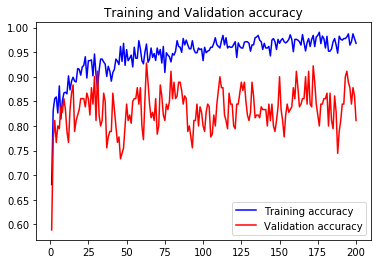

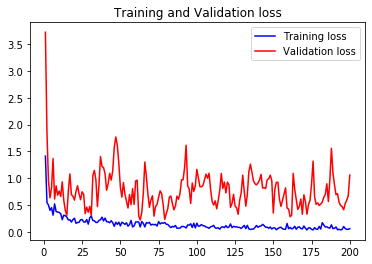

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
pickle.dump(model, open('ProjectModel.pkl', 'wb'))

In [ ]:
path='/content'
infile= open(path+ '/ProjectModel.pkl','rb')
best_model = pickle.load(infile)

In [ ]:
out=best_model.predict(x_test)

In [ ]:
class_name= {0:'eczema',1:'malenoma',2:'prosriasis'}

In [ ]:
from google.colab.patches import cv2_imshow

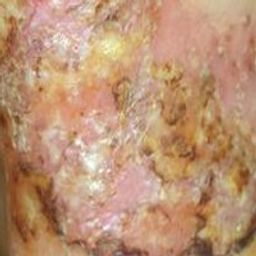

0
eczema


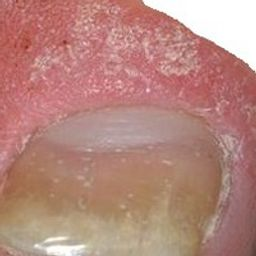

0
eczema


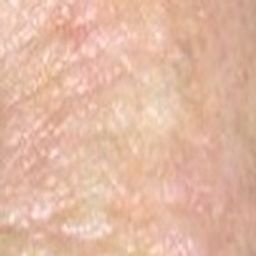

0
eczema


In [ ]:
j=0
for i in out[2]:
    cv2_imshow(x_test[j]*255)
    print(np.argmax(i))
    print(class_name[np.argmax(i)])
    j=j+1